In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
logfile = '/cubric/scanners/mri/7t/magnet_logs/022771data_latest.txt'

In [3]:
log7t = pd.read_csv(logfile, delimiter='\t')
log7t = log7t[log7t['Pressure (mB)']!=0]

In [25]:
log7t['Patient Coldhead 1st Stage Temp 5AB (K)'].describe()

count    8241.000000
mean       44.849796
std        13.442551
min        24.270000
25%        40.600000
50%        41.370000
75%        42.810000
max        99.000000
Name: Patient Coldhead 1st Stage Temp 5AB (K), dtype: float64

In [29]:
log7t['Service Coldhead 1st Stage Temp 6AB (K)'].describe()

count    8241.000000
mean        6.516949
std         9.453404
min         4.260000
25%         4.260000
50%         4.260000
75%         4.260000
max        99.000000
Name: Service Coldhead 1st Stage Temp 6AB (K), dtype: float64

In [5]:
log7t.tail()

,Date & time,Helium Level (ltr),Patient Cryocooler Status (H),Pressure (mB),Service Shield Link Top Temp 4ABb (K),Service Recondensor Temp 11CX (K),Service Coldhead 1st Stage Temp 6AB (K),Service 1st Stage Temp 11AB (K),Service Shield Link Bottom Temp 4AB (K),Service Outer Tube Bottom Temp 2ABb (K),...,Patient Shield Link Bottom Temp 3AB (K),Patient Helium Can Bottom Temp 1ABb (K),Patient Neck Plate Temp 7AB (K),Patient Endplate Temp 1AB (K),Service Cryocooler Status (I),Patient Cryocooler Status (F),Patient Cryocooler Status (G),Heater Ratio (%),Burst Disk,EDU Monitor Status
8496,18/12/22 16:57:27,2654,32,1040,81.38,4.21,4.26,30.95,99.0,62.70,...,99.0,62.35,99.0,63.42,0,32,70,19,0,0
8497,18/12/22 20:57:27,2654,32,1040,81.82,4.14,4.26,30.97,99.0,62.91,...,99.0,62.20,99.0,63.05,0,32,70,19,0,0
8498,19/12/22 00:57:27,2654,32,1040,82.66,4.02,4.26,30.96,99.0,62.76,...,99.0,61.86,99.0,63.46,0,32,70,19,0,0
8499,19/12/22 04:57:27,2654,32,1040,82.51,4.39,4.26,30.69,99.0,62.76,...,99.0,61.88,99.0,63.48,0,32,70,18,0,0
8500,19/12/22 08:57:27,2654,32,1040,82.66,4.30,4.26,30.96,99.0,63.22,...,99.0,61.90,99.0,63.46,0,32,70,17,0,0


In [6]:
meas_time = log7t['Date & time'].str.split('/|:| ', regex=True, expand=True)
meas_time

,0,1,2,3,4,5
23,02,05,15,08,44,19
24,03,05,15,08,44,19
25,04,05,15,08,44,19
26,05,05,15,08,44,19
28,07,05,15,08,30,01
...,...,...,...,...,...,...
8496,18,12,22,16,57,27
8497,18,12,22,20,57,27
8498,19,12,22,00,57,27
8499,19,12,22,04,57,27


In [7]:
meas_time[0]

23      02
24      03
25      04
26      05
28      07
        ..
8496    18
8497    18
8498    19
8499    19
8500    19
Name: 0, Length: 8241, dtype: object

In [8]:
#meas_time.iloc[:,1]
meas_dt = dt.datetime(meas_time[2],meas_time[1],meas_time[0],meas_time[3], meas_time[4], meas_time[5])

TypeError: cannot convert the series to <class 'int'>

In [9]:
meas_dt

NameError: name 'meas_dt' is not defined

<AxesSubplot: >

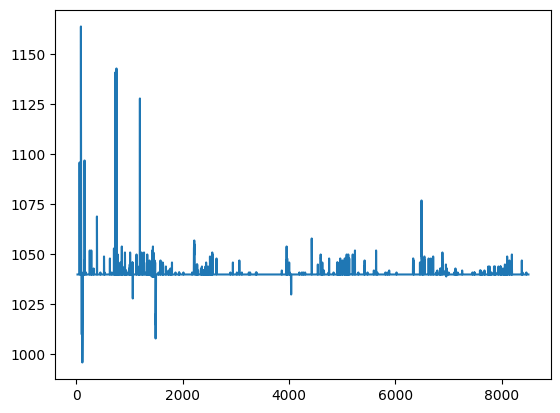

In [10]:
log7t['Pressure (mB)'].plot()

In [23]:
cryo_T = log7t[['Service Shield Link Top Temp 4ABb (K)',\
                      'Patient Shield Link Top Temp 3ABb (K)',\
                      'Service Endplate Temp 2AB (K)',\
                      'Patient Endplate Temp 1AB (K)',\
                      'Service Outer Tube Bottom Temp 2ABb (K)',\
                      'Service Coldhead 1st Stage Temp 6AB (K)',\
                      'Patient Coldhead 1st Stage Temp 5AB (K)' \
                     ]]

Index(['Date & time', 'Helium Level (ltr)', 'Patient Cryocooler Status (H)',
       'Pressure (mB)', 'Service Shield Link Top Temp 4ABb (K)',
       'Service Recondensor Temp 11CX (K)',
       'Service Coldhead 1st Stage Temp 6AB (K)',
       'Service 1st Stage Temp 11AB (K)',
       'Service Shield Link Bottom Temp 4AB (K)',
       'Service Outer Tube Bottom Temp 2ABb (K)',
       'Service Neck Plate Temp 8AB (K)', 'Service Endplate Temp 2AB (K)',
       'Patient Shield Link Top Temp 3ABb (K)',
       'Patient Recondensor Temp 9CX (K)',
       'Patient Coldhead 1st Stage Temp 5AB (K)',
       'Patient 1st Stage Temp 9AB (K)',
       'Patient Shield Link Bottom Temp 3AB (K)',
       'Patient Helium Can Bottom Temp 1ABb (K)',
       'Patient Neck Plate Temp 7AB (K)', 'Patient Endplate Temp 1AB (K)',
       'Service Cryocooler Status (I)', 'Patient Cryocooler Status (F)',
       'Patient Cryocooler Status (G)', 'Heater Ratio (%)', 'Burst Disk',
       'EDU Monitor Status'],
      dtype='

<AxesSubplot: >

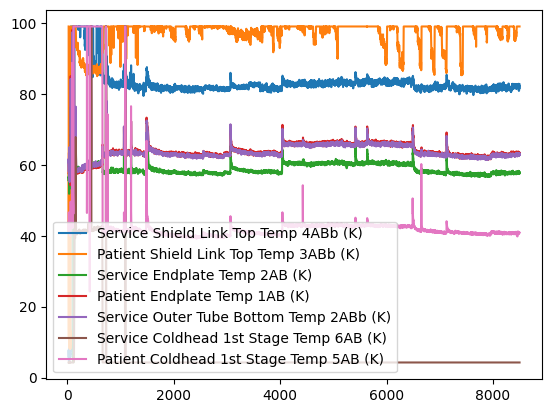

In [24]:
cryo_T.plot()